Robust PCA
==========

This example demonstrates the use of class [rpca.RobustPCA](http://sporco.rtfd.org/en/latest/modules/sporco.admm.rpca.html#sporco.admm.rpca.RobustPCA) for video foreground/background separation via Robust PCA, the low-rank component representing the static background and the sparse component representing the moving foreground.

In [1]:
from __future__ import print_function
from builtins import input

import numpy as np
import imageio

from sporco.admm import rpca
from sporco import signal
from sporco import plot
plot.config_notebook_plotting()

Load example video.

In [2]:
reader = imageio.get_reader('imageio:newtonscradle.gif')
nfrm = reader.get_length()
frmlst = []
for i, frm in enumerate(reader):
    frmlst.append(signal.rgb2gray(frm[..., 0:3].astype(np.float32)/255.0))
v = np.stack(frmlst, axis=2)

Construct matrix with each column consisting of a vectorised video frame.

In [3]:
S = v.reshape((-1, v.shape[-1]))

Set options for the Robust PCA solver, create the solver object, and solve, returning the estimates of the low rank and sparse components ``X`` and ``Y``. Unlike most other SPORCO classes for optimisation problems, [rpca.RobustPCA](http://sporco.rtfd.org/en/latest/modules/sporco.admm.rpca.html#sporco.admm.rpca.RobustPCA) has a meaningful default regularization parameter, as used here.

In [4]:
opt = rpca.RobustPCA.Options({'Verbose': True, 'gEvalY': False,
                              'MaxMainIter': 200, 'RelStopTol': 1e-3,
                              'AutoRho': {'Enabled': True}})
b = rpca.RobustPCA(S, None, opt)
X, Y = b.solve()

Itn   Fnc       NrmNuc    Nrmℓ1     Cnstr     r         s         ρ       
--------------------------------------------------------------------------


   0  8.94e+02  8.11e+02  1.44e+04  1.60e+01  1.99e-02  1.37e+00  1.12e-01
   1  8.98e+02  8.26e+02  1.24e+04  1.19e+01  1.47e-02  7.90e-01  1.12e-01


   2  1.04e+03  7.71e+02  4.59e+04  4.29e+01  5.33e-02  1.65e-01  1.52e-02
   3  1.16e+03  8.48e+02  5.43e+04  5.07e+01  5.98e-02  9.56e-02  8.66e-03


   4  1.05e+03  7.62e+02  5.02e+04  4.68e+01  5.83e-02  5.57e-02  6.85e-03
   5  1.06e+03  8.33e+02  3.86e+04  3.49e+01  4.19e-02  4.96e-02  6.85e-03


   6  9.57e+02  7.82e+02  3.03e+04  2.57e+01  3.20e-02  3.40e-02  6.85e-03
   7  9.53e+02  8.18e+02  2.34e+04  1.84e+01  2.26e-02  2.67e-02  6.85e-03
   8  9.02e+02  7.93e+02  1.89e+04  1.32e+01  1.65e-02  2.31e-02  6.85e-03
   9  9.04e+02  8.10e+02  1.63e+04  1.08e+01  1.34e-02  1.65e-02  5.79e-03


  10  8.80e+02  7.99e+02  1.40e+04  8.25e+00  1.03e-02  1.18e-02  5.21e-03
  11  8.77e+02  8.09e+02  1.17e+04  6.11e+00  7.59e-03  1.01e-02  5.21e-03
  12  8.67e+02  8.06e+02  1.07e+04  4.99e+00  6.22e-03  7.22e-03  4.50e-03


  13  8.65e+02  8.09e+02  9.66e+03  4.19e+00  5.22e-03  5.43e-03  4.50e-03
  14  8.62e+02  8.08e+02  9.27e+03  3.78e+00  4.70e-03  4.23e-03  4.50e-03
  15  8.61e+02  8.08e+02  9.09e+03  3.51e+00  4.38e-03  3.56e-03  4.50e-03


  16  8.60e+02  8.08e+02  9.02e+03  3.33e+00  4.15e-03  3.31e-03  5.00e-03
  17  8.59e+02  8.07e+02  9.01e+03  3.18e+00  3.96e-03  3.23e-03  5.59e-03
  18  8.59e+02  8.07e+02  9.00e+03  3.04e+00  3.78e-03  3.33e-03  6.19e-03


  19  8.59e+02  8.07e+02  8.97e+03  2.91e+00  3.62e-03  3.17e-03  6.19e-03
  20  8.59e+02  8.08e+02  8.92e+03  2.79e+00  3.48e-03  2.92e-03  6.19e-03
  21  8.59e+02  8.08e+02  8.87e+03  2.68e+00  3.33e-03  2.79e-03  6.19e-03


  22  8.59e+02  8.08e+02  8.83e+03  2.56e+00  3.19e-03  2.68e-03  6.19e-03
  23  8.59e+02  8.08e+02  8.79e+03  2.45e+00  3.05e-03  2.52e-03  6.19e-03
  24  8.59e+02  8.08e+02  8.77e+03  2.33e+00  2.90e-03  2.71e-03  6.82e-03


  25  8.59e+02  8.08e+02  8.76e+03  2.21e+00  2.76e-03  2.67e-03  6.82e-03
  26  8.59e+02  8.08e+02  8.76e+03  2.10e+00  2.61e-03  2.59e-03  6.82e-03
  27  8.59e+02  8.08e+02  8.75e+03  1.99e+00  2.48e-03  2.48e-03  6.82e-03


  28  8.59e+02  8.08e+02  8.74e+03  1.89e+00  2.35e-03  2.34e-03  6.82e-03
  29  8.59e+02  8.08e+02  8.74e+03  1.80e+00  2.24e-03  2.19e-03  6.82e-03
  30  8.58e+02  8.08e+02  8.72e+03  1.70e+00  2.12e-03  2.06e-03  6.82e-03


  31  8.58e+02  8.08e+02  8.70e+03  1.62e+00  2.01e-03  1.93e-03  6.82e-03
  32  8.58e+02  8.08e+02  8.69e+03  1.54e+00  1.92e-03  1.77e-03  6.82e-03
  33  8.58e+02  8.08e+02  8.67e+03  1.47e+00  1.83e-03  1.68e-03  6.82e-03


  34  8.58e+02  8.08e+02  8.65e+03  1.40e+00  1.74e-03  1.59e-03  6.82e-03
  35  8.58e+02  8.08e+02  8.64e+03  1.34e+00  1.66e-03  1.47e-03  6.82e-03
  36  8.58e+02  8.08e+02  8.63e+03  1.28e+00  1.59e-03  1.37e-03  6.82e-03


  37  8.58e+02  8.08e+02  8.62e+03  1.22e+00  1.52e-03  1.31e-03  6.82e-03
  38  8.58e+02  8.08e+02  8.61e+03  1.17e+00  1.46e-03  1.24e-03  6.82e-03
  39  8.58e+02  8.08e+02  8.60e+03  1.12e+00  1.39e-03  1.18e-03  6.82e-03


  40  8.58e+02  8.08e+02  8.60e+03  1.07e+00  1.33e-03  1.14e-03  6.82e-03
  41  8.58e+02  8.08e+02  8.59e+03  1.02e+00  1.27e-03  1.08e-03  6.82e-03
  42  8.58e+02  8.08e+02  8.59e+03  9.79e-01  1.22e-03  1.03e-03  6.82e-03


  43  8.58e+02  8.08e+02  8.58e+03  9.36e-01  1.17e-03  9.84e-04  6.82e-03
  44  8.58e+02  8.08e+02  8.58e+03  8.97e-01  1.12e-03  9.18e-04  6.82e-03
  45  8.58e+02  8.08e+02  8.57e+03  8.57e-01  1.07e-03  9.88e-04  7.52e-03


  46  8.58e+02  8.08e+02  8.56e+03  8.19e-01  1.02e-03  9.35e-04  7.52e-03
  47  8.58e+02  8.08e+02  8.55e+03  7.87e-01  9.79e-04  8.58e-04  7.52e-03
--------------------------------------------------------------------------


Display solve time.

In [5]:
print("RobustPCA solve time: %5.2f s" % b.timer.elapsed('solve'))

RobustPCA solve time:  4.22 s


Get iterations statistics from solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

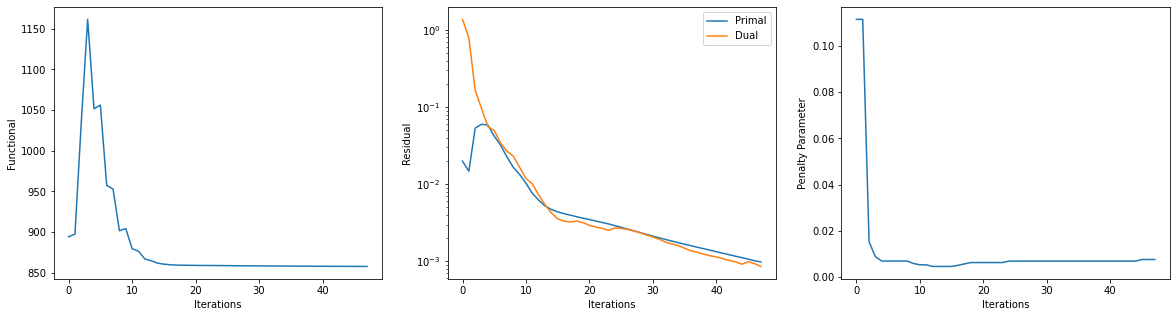

In [6]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual'], fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()

Reshape low-rank component ``X`` as background video sequence and sparse component ``Y`` as foreground video sequence.

In [7]:
vbg = X.reshape(v.shape)
vfg = Y.reshape(v.shape)

Display original video frames and corresponding background and foreground frames.

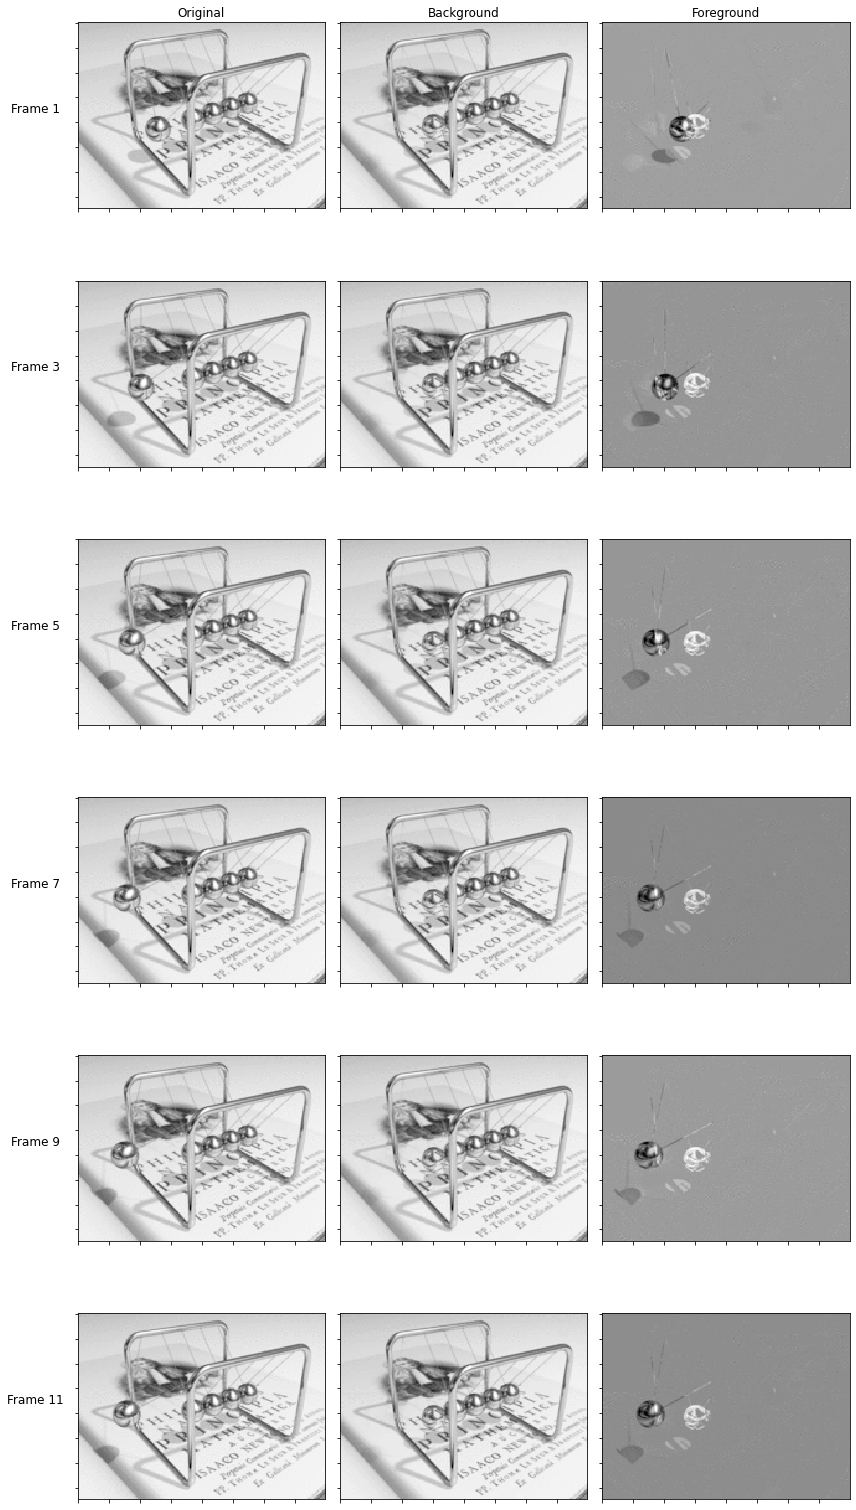

In [8]:
fig, ax = plot.subplots(nrows=6, ncols=3, figsize=(12, 22))
ax[0][0].set_title("Original")
ax[0][1].set_title("Background")
ax[0][2].set_title("Foreground")
for n, fn in enumerate(range(1, 13, 2)):
    plot.imview(v[..., fn], fig=fig, ax=ax[n][0])
    plot.imview(vbg[..., fn], fig=fig, ax=ax[n][1])
    plot.imview(vfg[..., fn], fig=fig, ax=ax[n][2])
    ax[n][0].set_ylabel("Frame %d" % fn, labelpad=35, rotation=0, size='large')
fig.tight_layout()
fig.show()